In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline           
#get visualizations inside notebook

In [200]:
df = pd.read_csv('titanic_train.csv',)

In [201]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
# check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

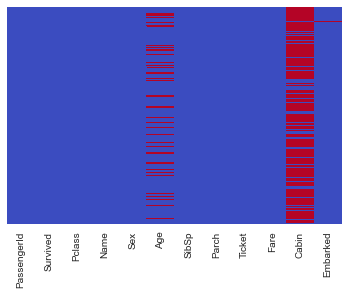

In [204]:
sns.set_style('dark')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

## Part of Age values and major cabin values are missing

<AxesSubplot:xlabel='Survived', ylabel='count'>

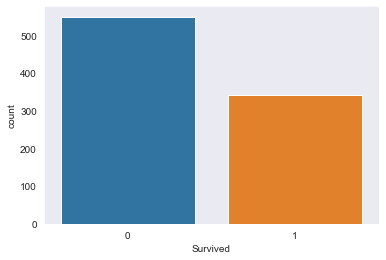

In [205]:
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='count', ylabel='Survived'>

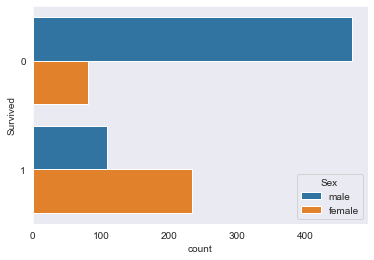

In [206]:
#check for survival rate of male and females
sns.countplot(data=df,y='Survived',hue='Sex')

### More females have survived than males. Remember rose and jack? Yeah....priority...

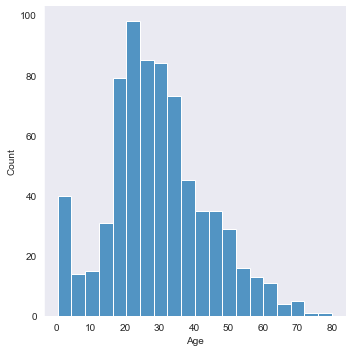

In [207]:
sns.displot(df.Age.dropna() )

<AxesSubplot:>

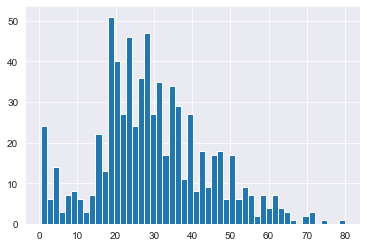

In [208]:
df['Age'].hist(bins=50)

### check the siblings and spouse 

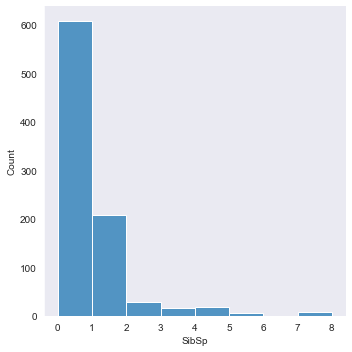

In [209]:
sns.displot(data=df, x='SibSp',bins=8)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

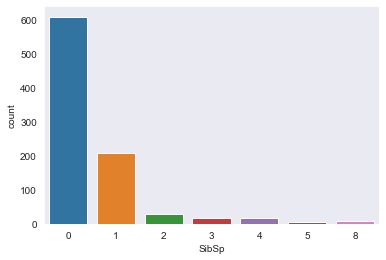

In [210]:
sns.countplot(data=df, x='SibSp')

<AxesSubplot:>

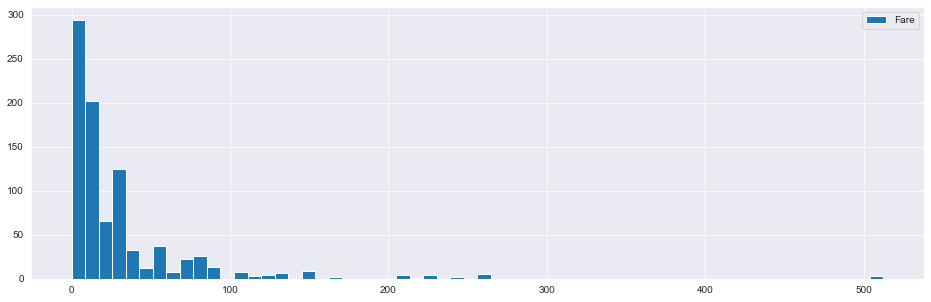

In [211]:
df['Fare'].hist(bins=60,figsize=(16,5),legend=True)

# Data Cleaning

In [213]:
# about age and cabin

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

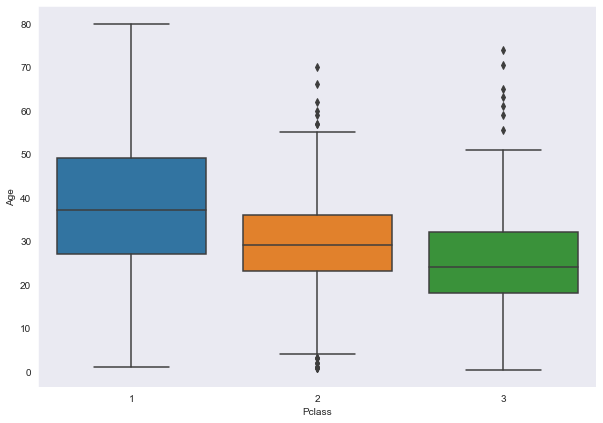

In [214]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Age',x='Pclass',data=df)

### missing value of age is justified with respect to the other members of their passenger-class

In [215]:
def impute(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==1:return 38
        elif pclass==2:return 30
        else:return 25
    else:
        return age
    
data_age = df[['Age','Pclass']].apply(impute,axis=1) 
data_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [216]:
df.Age = data_age
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [217]:
df.Cabin.value_counts(dropna=False)

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
E12              1
D11              1
A24              1
C110             1
E38              1
Name: Cabin, Length: 148, dtype: int64

### we can take the people with or without cabin as a feature

In [239]:
b =(df.Cabin[5])

In [243]:
a = []
for i in range(len(df.Cabin)):
    if str(df.Cabin[i]) == 'nan':
        a.append(0)
    else:
        a.append(1)
df.Cabin = a
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [244]:
a =0
for i in range(len(df)):
    if df.Pclass[i] == 3 and df.Cabin[i] == 0:
        a=a+1
a, df.Pclass.value_counts()        

(479,
 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64)

### have to assume all the missing values in cabin....didn't had a cabin as they seem from Pclass = 3

In [245]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [246]:
df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [247]:
df.Embarked.fillna(df.Embarked.value_counts().index[0],inplace=True)
df.Embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [248]:
df.Embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### dropping unnessary columns

In [249]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

### doing get_dummies of sex and embarked column to make it 0 & 1 by dropping first column

In [250]:
dummies_sex = pd.get_dummies(df['Sex'],drop_first=True)
dummies_embarked = pd.get_dummies(df['Embarked'],drop_first=True)
print(dummies_sex.head(3))
dummies_embarked.head(3)

   male
0     1
1     0
2     0


,Q,S
0,0,1
1,0,0
2,0,1


In [251]:
df = pd.concat([df,dummies_sex,dummies_embarked],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,0,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,1,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,0,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0,S,1,0,1
887,888,1,1,female,19.0,0,0,30.0000,1,S,0,0,1
888,889,0,3,female,25.0,1,2,23.4500,0,S,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,1,C,1,0,0


In [252]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,1,0,0


## final data looks like 

In [254]:
df.drop('PassengerId',axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [255]:
y = df.Survived
df.drop('Survived',inplace=True, axis=1)

## Train-test data splitting and model creation

In [256]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df,y, test_size=0.2)

In [262]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', max_iter=100,random_state=42)
log_model.fit(train_X,train_y)

LogisticRegression(random_state=42, solver='liblinear')

In [263]:
prediction = log_model.predict(test_X)

In [264]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(prediction,test_y)
accuracy

array([[91, 20],
       [22, 46]], dtype=int64)

# evaluation

In [265]:
from sklearn.metrics import classification_report
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       113
           1       0.68      0.70      0.69        66

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

